In [1]:
from sklearn.svm import SVC,LinearSVC
import pandas as pd, numpy as np, seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,roc_auc_score,
    precision_score, recall_score, 
    f1_score, confusion_matrix,
    ConfusionMatrixDisplay
)

In [2]:
data = pd.read_csv('C:/Users/pconn/OneDrive/Desktop/Machine Learning/ML/data/mcaNd-npc.csv')
data_pc = pd.read_csv('C:/Users/pconn/OneDrive/Desktop/Machine Learning/ML/data/mcaNd.csv')
labels = pd.read_csv('C:/Users/pconn/OneDrive/Desktop/Machine Learning/ML/data/final_clean_r2.csv')['outcome']

In [3]:
X_train,x_test,y_train,y_test = train_test_split(
    data,
    labels,
    stratify=labels,
    test_size=0.2,
    random_state=9001
)
X_train_pc,x_test_pc,y_train,y_test = train_test_split(
    data_pc,
    labels,
    stratify=labels,
    test_size=0.2,
    random_state=9001
)

In [4]:
# output_data = pd.DataFrame({
#     'y_true':[],
#     'Default':[],
#     'LinearC=0.5':[],
#     'SigmoidC=1.5':[]
# })
prediction_data = {}

## Kernel 1 - Default (Without Protected Classes)

In [5]:
svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(x_test)

In [6]:
svc2 = SVC()
svc2.fit(X_train_pc,y_train)
y_pred_pc = svc2.predict(x_test_pc)

In [7]:
results = pd.DataFrame({
    'Model':[],
    'Data':[],
    'Accuracy':[],
    'Precision':[],
    'Recall':[],
    'F1':[],
    'ROC-AUC':[]
})
results.loc[len(results)] = {
    'Model':'SVM RBF (C=1)',
    'Data':'Without Protected Classes',
    'Accuracy':accuracy_score(y_test,y_pred),
    'Precision':precision_score(y_test,y_pred),
    'Recall':recall_score(y_test,y_pred), 
    'F1':f1_score(y_test,y_pred),
    'ROC-AUC':roc_auc_score(y_test,y_pred)
}
results.loc[len(results)] = {
    'Model':'SVM RBF (C=1)',
    'Data':'With Protected Classes',
    'Accuracy':accuracy_score(y_test,y_pred_pc),
    'Precision':precision_score(y_test,y_pred_pc),
    'Recall':recall_score(y_test,y_pred_pc),
    'F1':f1_score(y_test,y_pred_pc),
    'ROC-AUC':roc_auc_score(y_test,y_pred_pc)
}
results

,Model,Data,Accuracy,Precision,Recall,F1,ROC-AUC
0,SVM RBF (C=1),Without Protected Classes,0.963925,0.985485,0.972139,0.978767,0.943759
1,SVM RBF (C=1),With Protected Classes,0.963999,0.982785,0.974986,0.978870,0.937026


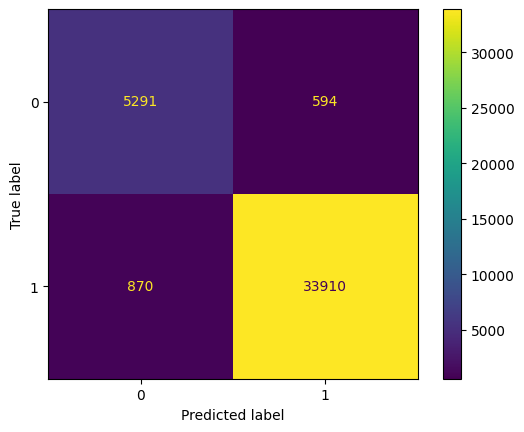

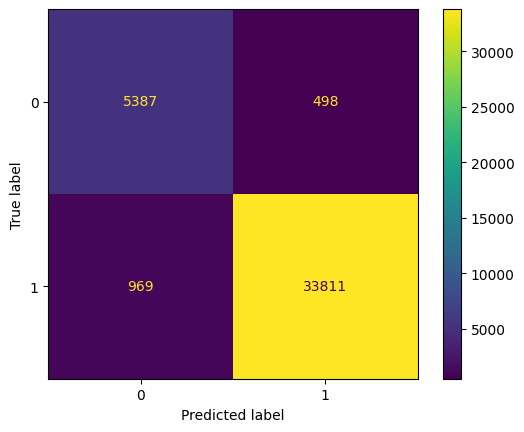

In [8]:
ConfusionMatrixDisplay(
    confusion_matrix(
        y_pred=y_pred_pc,y_true=y_test
    )
).plot()
ConfusionMatrixDisplay(
    confusion_matrix(
        y_pred=y_pred,y_true=y_test
    )
).plot()

In [9]:
prediction_data['y_true'] = y_test
prediction_data['SVM_NPC_RBF_1'] = y_pred
prediction_data['SVM_PC_RBF_1'] = y_pred_pc

## Kernel 1 - RBF with C=1.5

In [10]:
svc = SVC(C=1.5)
svc.fit(X_train,y_train)
y_pred = svc.predict(x_test)

In [11]:
svc2 = SVC(C=1.5)
svc2.fit(X_train_pc,y_train)
y_pred_pc = svc2.predict(x_test_pc)

In [12]:
results.loc[len(results)] = {
    'Model':'SVM RBF (C=1.5)',
    'Data':'Without Protected Classes',
    'Accuracy':accuracy_score(y_test,y_pred),
    'Precision':precision_score(y_test,y_pred),
    'Recall':recall_score(y_test,y_pred),
    'F1':f1_score(y_test,y_pred),
    'ROC-AUC':roc_auc_score(y_test,y_pred)
}
results.loc[len(results)] = {
    'Model':'SVM RBF (C=1.5)',
    'Data':'With Protected Classes',
    'Accuracy':accuracy_score(y_test,y_pred_pc),
    'Precision':precision_score(y_test,y_pred_pc),
    'Recall':recall_score(y_test,y_pred_pc),
    'F1':f1_score(y_test,y_pred_pc),
    'ROC-AUC':roc_auc_score(y_test,y_pred_pc)
}
results

,Model,Data,Accuracy,Precision,Recall,F1,ROC-AUC
0,SVM RBF (C=1),Without Protected Classes,0.963925,0.985485,0.972139,0.978767,0.943759
1,SVM RBF (C=1),With Protected Classes,0.963999,0.982785,0.974986,0.978870,0.937026
2,SVM RBF (C=1.5),Without Protected Classes,0.963826,0.985200,0.972312,0.978714,0.942995
3,SVM RBF (C=1.5),With Protected Classes,0.964244,0.983182,0.974871,0.979008,0.938157


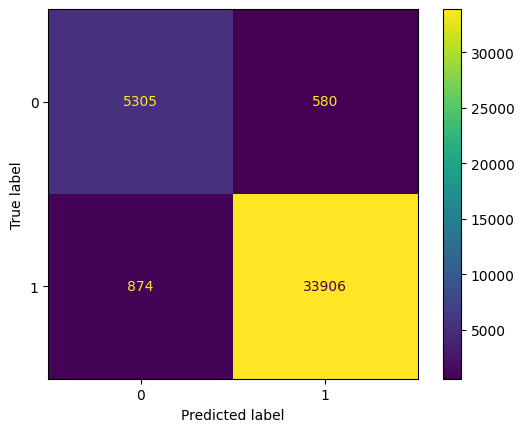

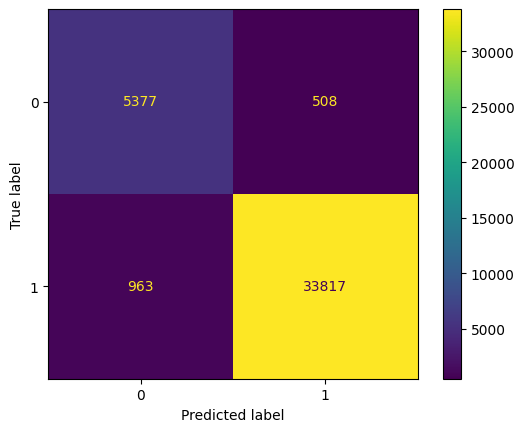

In [13]:
ConfusionMatrixDisplay(
    confusion_matrix(
        y_pred=y_pred_pc,y_true=y_test
    )
).plot()
ConfusionMatrixDisplay(
    confusion_matrix(
        y_pred=y_pred,y_true=y_test
    )
).plot()

In [14]:
prediction_data['y_true'] = y_test
prediction_data['SVM_NPC_RBF_1.5'] = y_pred
prediction_data['SVM_PC_RBF_1.5'] = y_pred_pc

## Kernel 1 - RBF with C=0.5

In [15]:
svc = SVC(C=.5)
svc.fit(X_train,y_train)
y_pred = svc.predict(x_test)

In [16]:
svc2 = SVC(C=.5)
svc2.fit(X_train_pc,y_train)
y_pred_pc = svc2.predict(x_test_pc)

In [17]:
results.loc[len(results)] = {
    'Model':'SVM RBF (C=0.5)',
    'Data':'Without Protected Classes',
    'Accuracy':accuracy_score(y_test,y_pred),
    'Precision':precision_score(y_test,y_pred),
    'Recall':recall_score(y_test,y_pred),
    'F1':f1_score(y_test,y_pred),
    'ROC-AUC':roc_auc_score(y_test,y_pred)
}
results.loc[len(results)] = {
    'Model':'SVM RBF (C=0.5)',
    'Data':'With Protected Classes',
    'Accuracy':accuracy_score(y_test,y_pred_pc),
    'Precision':precision_score(y_test,y_pred_pc),
    'Recall':recall_score(y_test,y_pred_pc),
    'F1':f1_score(y_test,y_pred_pc),
    'ROC-AUC':roc_auc_score(y_test,y_pred_pc)
}
results

,Model,Data,Accuracy,Precision,Recall,F1,ROC-AUC
0,SVM RBF (C=1),Without Protected Classes,0.963925,0.985485,0.972139,0.978767,0.943759
1,SVM RBF (C=1),With Protected Classes,0.963999,0.982785,0.974986,0.978870,0.937026
2,SVM RBF (C=1.5),Without Protected Classes,0.963826,0.985200,0.972312,0.978714,0.942995
3,SVM RBF (C=1.5),With Protected Classes,0.964244,0.983182,0.974871,0.979008,0.938157
4,SVM RBF (C=0.5),Without Protected Classes,0.963408,0.984684,0.972340,0.978473,0.941480
5,SVM RBF (C=0.5),With Protected Classes,0.962671,0.981249,0.974986,0.978107,0.932438


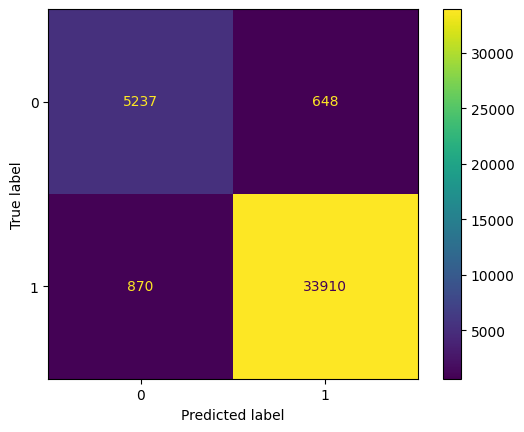

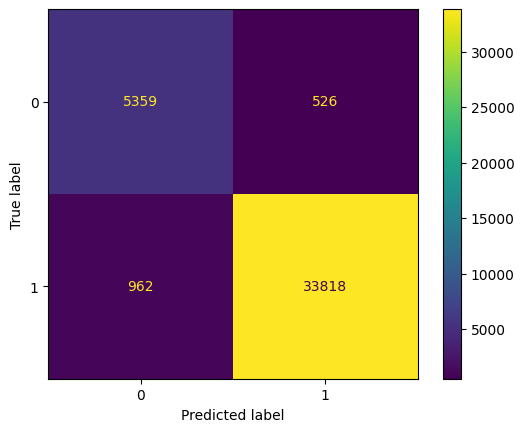

In [18]:
ConfusionMatrixDisplay(
    confusion_matrix(
        y_pred=y_pred_pc,y_true=y_test
    )
).plot()
ConfusionMatrixDisplay(
    confusion_matrix(
        y_pred=y_pred,y_true=y_test
    )
).plot()

In [19]:
prediction_data['y_true'] = y_test
prediction_data['SVM_NPC_RBF_0.5'] = y_pred
prediction_data['SVM_PC_RBF_0.5'] = y_pred_pc

## Kernel 2 - Linear with C=0.5

In [20]:
svc = SVC(C=.5,kernel='linear')
svc.fit(X_train,y_train)

SVC(C=0.5, kernel='linear')

In [21]:
y_pred = svc.predict(x_test)
prediction_data['SVM_NPC_LIN_0.5'] = y_pred

In [22]:
svc2 = SVC(C=.5,kernel='linear')
svc2.fit(X_train_pc,y_train)

SVC(C=0.5, kernel='linear')

In [23]:
y_pred_pc = svc2.predict(x_test_pc)
prediction_data['SVM_PC_LIN_0.5'] = y_pred_pc

In [24]:
results.loc[len(results)] = {
    'Model':'SVM Lin (C=0.5)',
    'Data':'Without Protected Classes',
    'Accuracy':accuracy_score(y_test,y_pred),
    'Precision':precision_score(y_test,y_pred),
    'Recall':recall_score(y_test,y_pred),
    'F1':f1_score(y_test,y_pred),
    'ROC-AUC':roc_auc_score(y_test,y_pred)
}
results.loc[len(results)] = {
    'Model':'SVM Lin (C=0.5)',
    'Data':'With Protected Classes',
    'Accuracy':accuracy_score(y_test,y_pred_pc),
    'Precision':precision_score(y_test,y_pred_pc),
    'Recall':recall_score(y_test,y_pred_pc),
    'F1':f1_score(y_test,y_pred_pc),
    'ROC-AUC':roc_auc_score(y_test,y_pred_pc)
}
results

,Model,Data,Accuracy,Precision,Recall,F1,ROC-AUC
0,SVM RBF (C=1),Without Protected Classes,0.963925,0.985485,0.972139,0.978767,0.943759
1,SVM RBF (C=1),With Protected Classes,0.963999,0.982785,0.974986,0.978870,0.937026
2,SVM RBF (C=1.5),Without Protected Classes,0.963826,0.985200,0.972312,0.978714,0.942995
3,SVM RBF (C=1.5),With Protected Classes,0.964244,0.983182,0.974871,0.979008,0.938157
4,SVM RBF (C=0.5),Without Protected Classes,0.963408,0.984684,0.972340,0.978473,0.941480
5,SVM RBF (C=0.5),With Protected Classes,0.962671,0.981249,0.974986,0.978107,0.932438
6,SVM Lin (C=0.5),Without Protected Classes,0.961638,0.983777,0.971162,0.977429,0.938257
7,SVM Lin (C=0.5),With Protected Classes,0.964048,0.984922,0.972858,0.978853,0.942419


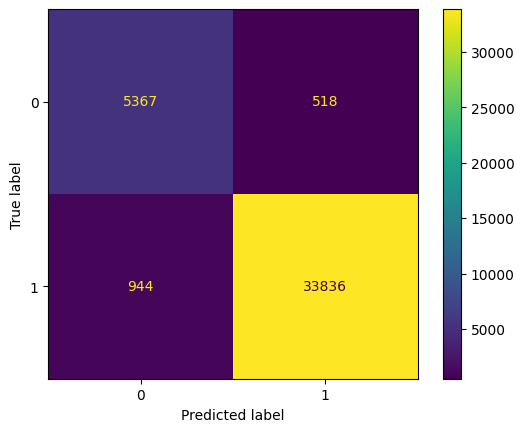

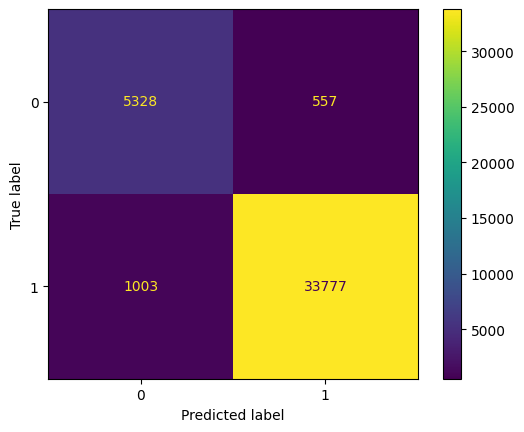

In [25]:
ConfusionMatrixDisplay(
    confusion_matrix(
        y_pred=y_pred_pc,y_true=y_test
    )
).plot()
ConfusionMatrixDisplay(
    confusion_matrix(
        y_pred=y_pred,y_true=y_test
    )
).plot()

## Kernel 2 - Linear with C=1

In [26]:
svc = SVC(C=1,kernel='linear')
svc.fit(X_train,y_train)
y_pred = svc.predict(x_test)
prediction_data['SVM_NPC_LIN_1'] = y_pred

In [27]:
svc2 = SVC(C=1,kernel='linear')
svc2.fit(X_train_pc,y_train)
y_pred_pc = svc2.predict(x_test_pc)
prediction_data['SVM_PC_LIN_1'] = y_pred_pc

In [28]:
results.loc[len(results)] = {
    'Model':'SVM Lin (C=1)',
    'Data':'Without Protected Classes',
    'Accuracy':accuracy_score(y_test,y_pred),
    'Precision':precision_score(y_test,y_pred),
    'Recall':recall_score(y_test,y_pred),
    'F1':f1_score(y_test,y_pred),
    'ROC-AUC':roc_auc_score(y_test,y_pred)
}
results.loc[len(results)] = {
    'Model':'SVM Lin (C=1)',
    'Data':'With Protected Classes',
    'Accuracy':accuracy_score(y_test,y_pred_pc),
    'Precision':precision_score(y_test,y_pred_pc),
    'Recall':recall_score(y_test,y_pred_pc),
    'F1':f1_score(y_test,y_pred_pc),
    'ROC-AUC':roc_auc_score(y_test,y_pred_pc)
}

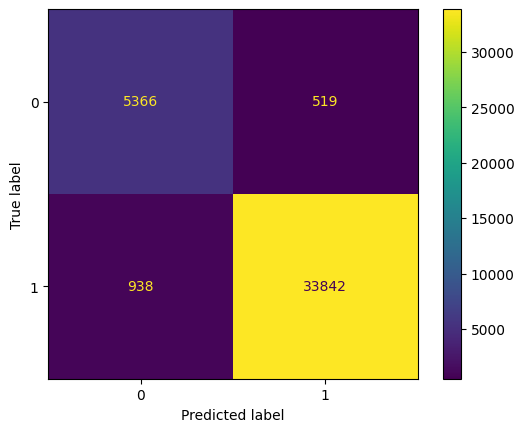

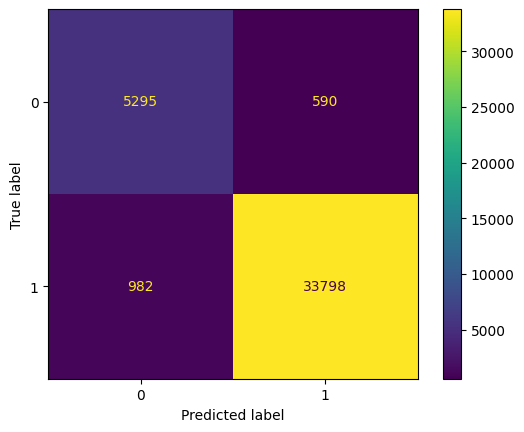

In [29]:
ConfusionMatrixDisplay(
    confusion_matrix(
        y_pred=y_pred_pc,y_true=y_test
    )
).plot()
ConfusionMatrixDisplay(
    confusion_matrix(
        y_pred=y_pred,y_true=y_test
    )
).plot()

## Kernel 2 - Linear with C=1.5

In [30]:
svc = SVC(C=1.5,kernel='linear')
svc.fit(X_train,y_train)
y_pred = svc.predict(x_test)
prediction_data['SVM_NPC_LIN_1.5'] = y_pred

In [31]:
svc2 = SVC(C=1.5,kernel='linear')
svc2.fit(X_train_pc,y_train)
y_pred_pc = svc2.predict(x_test_pc)
prediction_data['SVM_PC_LIN_1.5'] = y_pred_pc

In [32]:
results.loc[len(results)] = {
    'Model':'SVM Lin (C=1.5)',
    'Data':'Without Protected Classes',
    'Accuracy':accuracy_score(y_test,y_pred),
    'Precision':precision_score(y_test,y_pred),
    'Recall':recall_score(y_test,y_pred),
    'F1':f1_score(y_test,y_pred),
    'ROC-AUC':roc_auc_score(y_test,y_pred)
}
results.loc[len(results)] = {
    'Model':'SVM Lin (C=1.5)',
    'Data':'With Protected Classes',
    'Accuracy':accuracy_score(y_test,y_pred_pc),
    'Precision':precision_score(y_test,y_pred_pc),
    'Recall':recall_score(y_test,y_pred_pc),
    'F1':f1_score(y_test,y_pred_pc),
    'ROC-AUC':roc_auc_score(y_test,y_pred_pc)
}
results

,Model,Data,Accuracy,Precision,Recall,F1,ROC-AUC
0,SVM RBF (C=1),Without Protected Classes,0.963925,0.985485,0.972139,0.978767,0.943759
1,SVM RBF (C=1),With Protected Classes,0.963999,0.982785,0.974986,0.978870,0.937026
2,SVM RBF (C=1.5),Without Protected Classes,0.963826,0.985200,0.972312,0.978714,0.942995
3,SVM RBF (C=1.5),With Protected Classes,0.964244,0.983182,0.974871,0.979008,0.938157
4,SVM RBF (C=0.5),Without Protected Classes,0.963408,0.984684,0.972340,0.978473,0.941480
5,SVM RBF (C=0.5),With Protected Classes,0.962671,0.981249,0.974986,0.978107,0.932438
6,SVM Lin (C=0.5),Without Protected Classes,0.961638,0.983777,0.971162,0.977429,0.938257
7,SVM Lin (C=0.5),With Protected Classes,0.964048,0.984922,0.972858,0.978853,0.942419
8,SVM Lin (C=1),Without Protected Classes,0.961343,0.982843,0.971765,0.977273,0.935755
9,SVM Lin (C=1),With Protected Classes,0.964171,0.984896,0.973030,0.978927,0.942420


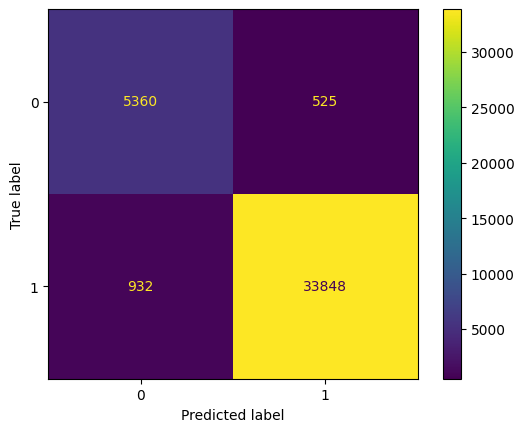

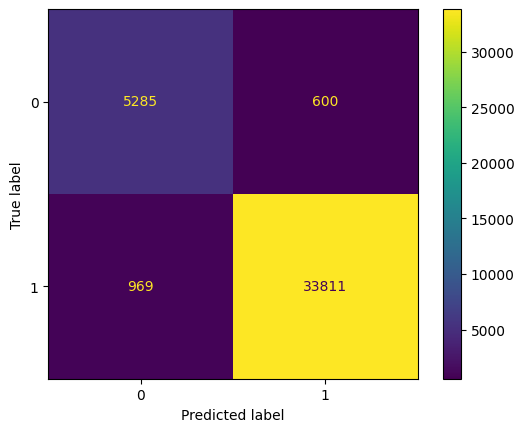

In [33]:
ConfusionMatrixDisplay(
    confusion_matrix(
        y_pred=y_pred_pc,y_true=y_test
    )
).plot()
ConfusionMatrixDisplay(
    confusion_matrix(
        y_pred=y_pred,y_true=y_test
    )
).plot()

## Kernel 3 - Sigmoid Kernel with C=1.5

In [34]:
svc = SVC(C=1.5,kernel='sigmoid')
svc.fit(X_train,y_train)

SVC(C=1.5, kernel='sigmoid')

In [35]:
y_pred = svc.predict(x_test)
prediction_data['SVM_NPC_SIG_1.5'] = y_pred_pc

In [36]:
svc2 = SVC(C=1.5,kernel='sigmoid')
svc2.fit(X_train_pc,y_train)

SVC(C=1.5, kernel='sigmoid')

In [37]:
y_pred_pc = svc2.predict(x_test_pc)
prediction_data['SVM_PC_SIG_1.5'] = y_pred_pc

In [38]:
results.loc[len(results)] = {
    'Model':'SVM Sig (C=1.5)',
    'Data':'Without Protected Classes',
    'Accuracy':accuracy_score(y_test,y_pred),
    'Precision':precision_score(y_test,y_pred),
    'Recall':recall_score(y_test,y_pred),
    'F1':f1_score(y_test,y_pred),
    'ROC-AUC':roc_auc_score(y_test,y_pred)
}
results.loc[len(results)] = {
    'Model':'SVM Sig (C=1.5)',
    'Data':'With Protected Classes',
    'Accuracy':accuracy_score(y_test,y_pred_pc),
    'Precision':precision_score(y_test,y_pred_pc),
    'Recall':recall_score(y_test,y_pred_pc),
    'F1':f1_score(y_test,y_pred_pc),
    'ROC-AUC':roc_auc_score(y_test,y_pred_pc)
}
results

,Model,Data,Accuracy,Precision,Recall,F1,ROC-AUC
0,SVM RBF (C=1),Without Protected Classes,0.963925,0.985485,0.972139,0.978767,0.943759
1,SVM RBF (C=1),With Protected Classes,0.963999,0.982785,0.974986,0.978870,0.937026
2,SVM RBF (C=1.5),Without Protected Classes,0.963826,0.985200,0.972312,0.978714,0.942995
3,SVM RBF (C=1.5),With Protected Classes,0.964244,0.983182,0.974871,0.979008,0.938157
4,SVM RBF (C=0.5),Without Protected Classes,0.963408,0.984684,0.972340,0.978473,0.941480
5,SVM RBF (C=0.5),With Protected Classes,0.962671,0.981249,0.974986,0.978107,0.932438
6,SVM Lin (C=0.5),Without Protected Classes,0.961638,0.983777,0.971162,0.977429,0.938257
7,SVM Lin (C=0.5),With Protected Classes,0.964048,0.984922,0.972858,0.978853,0.942419
8,SVM Lin (C=1),Without Protected Classes,0.961343,0.982843,0.971765,0.977273,0.935755
9,SVM Lin (C=1),With Protected Classes,0.964171,0.984896,0.973030,0.978927,0.942420


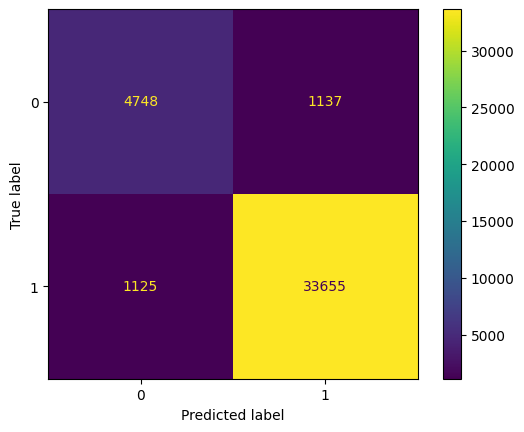

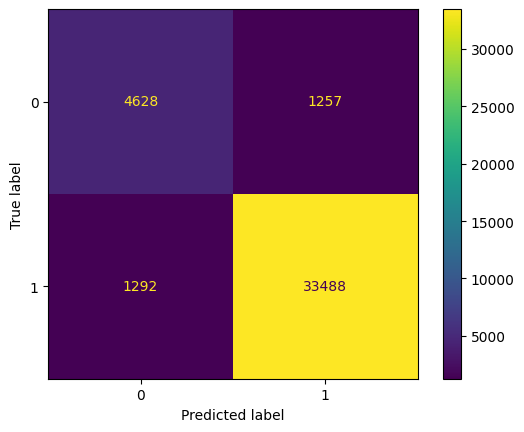

In [39]:
ConfusionMatrixDisplay(
    confusion_matrix(
        y_pred=y_pred_pc,y_true=y_test
    )
).plot()
ConfusionMatrixDisplay(
    confusion_matrix(
        y_pred=y_pred,y_true=y_test
    )
).plot()

## Sigmoid Kernel C=0.5

In [40]:
svc = SVC(C=.5,kernel='sigmoid')
svc.fit(X_train,y_train)
y_pred = svc.predict(x_test)
prediction_data['SVM_NPC_SIG_0.5'] = y_pred_pc

In [42]:
svc2 = SVC(C=.5,kernel='sigmoid')
svc2.fit(X_train_pc,y_train)
y_pred_pc = svc2.predict(x_test_pc)
prediction_data['SVM_PC_SIG_0.5'] = y_pred_pc

In [43]:
results.loc[len(results)] = {
    'Model':'SVM Sig (C=0.5)',
    'Data':'Without Protected Classes',
    'Accuracy':accuracy_score(y_test,y_pred),
    'Precision':precision_score(y_test,y_pred),
    'Recall':recall_score(y_test,y_pred),
    'F1':f1_score(y_test,y_pred),
    'ROC-AUC':roc_auc_score(y_test,y_pred)
}
results.loc[len(results)] = {
    'Model':'SVM Sig (C=0.5)',
    'Data':'With Protected Classes',
    'Accuracy':accuracy_score(y_test,y_pred_pc),
    'Precision':precision_score(y_test,y_pred_pc),
    'Recall':recall_score(y_test,y_pred_pc),
    'F1':f1_score(y_test,y_pred_pc),
    'ROC-AUC':roc_auc_score(y_test,y_pred_pc)
}
results

,Model,Data,Accuracy,Precision,Recall,F1,ROC-AUC
0,SVM RBF (C=1),Without Protected Classes,0.963925,0.985485,0.972139,0.978767,0.943759
1,SVM RBF (C=1),With Protected Classes,0.963999,0.982785,0.974986,0.978870,0.937026
2,SVM RBF (C=1.5),Without Protected Classes,0.963826,0.985200,0.972312,0.978714,0.942995
3,SVM RBF (C=1.5),With Protected Classes,0.964244,0.983182,0.974871,0.979008,0.938157
4,SVM RBF (C=0.5),Without Protected Classes,0.963408,0.984684,0.972340,0.978473,0.941480
5,SVM RBF (C=0.5),With Protected Classes,0.962671,0.981249,0.974986,0.978107,0.932438
6,SVM Lin (C=0.5),Without Protected Classes,0.961638,0.983777,0.971162,0.977429,0.938257
7,SVM Lin (C=0.5),With Protected Classes,0.964048,0.984922,0.972858,0.978853,0.942419
8,SVM Lin (C=1),Without Protected Classes,0.961343,0.982843,0.971765,0.977273,0.935755
9,SVM Lin (C=1),With Protected Classes,0.964171,0.984896,0.973030,0.978927,0.942420


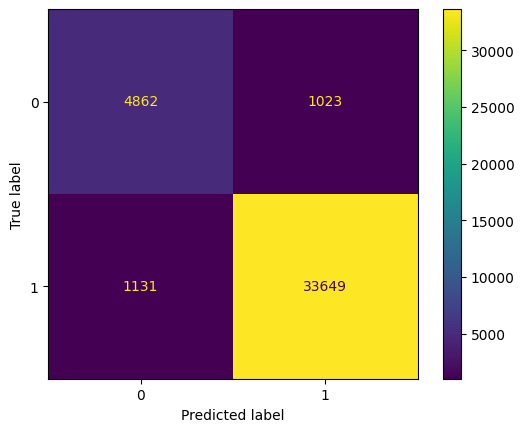

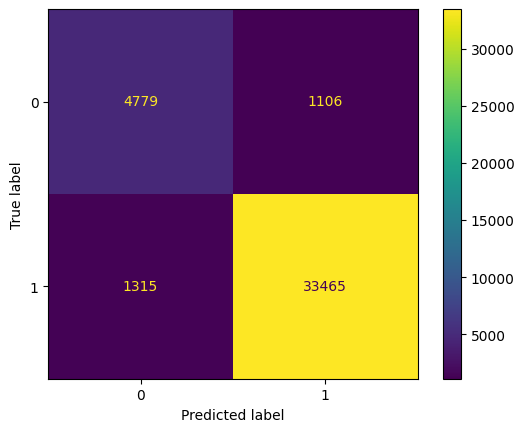

In [44]:
ConfusionMatrixDisplay(
    confusion_matrix(
        y_pred=y_pred_pc,y_true=y_test
    )
).plot()
ConfusionMatrixDisplay(
    confusion_matrix(
        y_pred=y_pred,y_true=y_test
    )
).plot()

## Sigmoid Kernel C=1.0

In [45]:
svc = SVC(C=1,kernel='sigmoid')
svc.fit(X_train,y_train)
y_pred = svc.predict(x_test)
prediction_data['SVM_NPC_SIG_1'] = y_pred

In [47]:
svc2 = SVC(C=1,kernel='sigmoid')
svc2.fit(X_train_pc,y_train)
y_pred_pc = svc2.predict(x_test_pc)
prediction_data['SVM_PC_SIG_1'] = y_pred_pc

In [48]:
results.loc[len(results)] = {
    'Model':'SVM Sig (C=1)',
    'Data':'Without Protected Classes',
    'Accuracy':accuracy_score(y_test,y_pred),
    'Precision':precision_score(y_test,y_pred),
    'Recall':recall_score(y_test,y_pred),
    'F1':f1_score(y_test,y_pred),
    'ROC-AUC':roc_auc_score(y_test,y_pred)
}
results.loc[len(results)] = {
    'Model':'SVM Sig (C=1)',
    'Data':'With Protected Classes',
    'Accuracy':accuracy_score(y_test,y_pred_pc),
    'Precision':precision_score(y_test,y_pred_pc),
    'Recall':recall_score(y_test,y_pred_pc),
    'F1':f1_score(y_test,y_pred_pc),
    'ROC-AUC':roc_auc_score(y_test,y_pred_pc)
}
results

,Model,Data,Accuracy,Precision,Recall,F1,ROC-AUC
0,SVM RBF (C=1),Without Protected Classes,0.963925,0.985485,0.972139,0.978767,0.943759
1,SVM RBF (C=1),With Protected Classes,0.963999,0.982785,0.974986,0.978870,0.937026
2,SVM RBF (C=1.5),Without Protected Classes,0.963826,0.985200,0.972312,0.978714,0.942995
3,SVM RBF (C=1.5),With Protected Classes,0.964244,0.983182,0.974871,0.979008,0.938157
4,SVM RBF (C=0.5),Without Protected Classes,0.963408,0.984684,0.972340,0.978473,0.941480
5,SVM RBF (C=0.5),With Protected Classes,0.962671,0.981249,0.974986,0.978107,0.932438
6,SVM Lin (C=0.5),Without Protected Classes,0.961638,0.983777,0.971162,0.977429,0.938257
7,SVM Lin (C=0.5),With Protected Classes,0.964048,0.984922,0.972858,0.978853,0.942419
8,SVM Lin (C=1),Without Protected Classes,0.961343,0.982843,0.971765,0.977273,0.935755
9,SVM Lin (C=1),With Protected Classes,0.964171,0.984896,0.973030,0.978927,0.942420


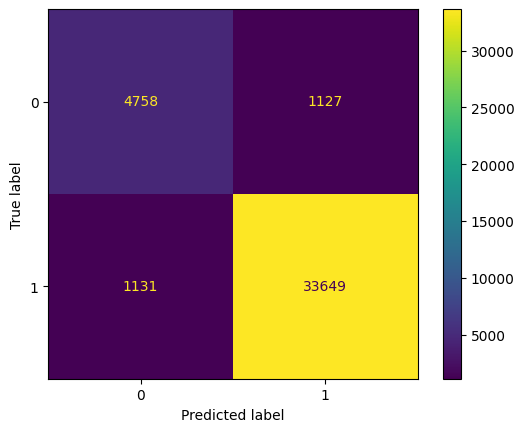

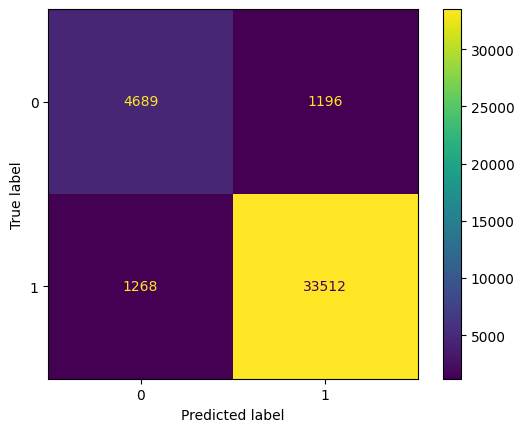

In [49]:
ConfusionMatrixDisplay(
    confusion_matrix(
        y_pred=y_pred_pc,y_true=y_test
    )
).plot()
ConfusionMatrixDisplay(
    confusion_matrix(
        y_pred=y_pred,y_true=y_test
    )
).plot()

In [50]:
pred_sum = pd.DataFrame(prediction_data)

pred_sum.to_csv('../data/SVM_predictions2.csv')

In [51]:
pd.DataFrame({'ind':list(pred_sum.index)}).to_csv('../data/SVM_test_indexes2.csv',index=False)